<a href="https://colab.research.google.com/github/jgesc-05/clase-inteligencia-artificial/blob/main/Fundamento_Cuaderno_14_Regresi%C3%B3n_log%C3%ADstica_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color="red">Cuaderno 14. Regresión logística </font>
## <font color="red">14.1 ¿Qué es la Regresión Logística?</font>
La regresión logística es un algoritmo de aprendizaje supervisado utilizado principalmente para problemas de clasificación binaria (dos categorías). Su objetivo es modelar la relación entre un conjunto de variables independientes (predictores) y una variable dependiente categórica. A diferencia de la regresión lineal, el resultado de la regresión logística se interpreta como una probabilidad que oscila entre 0 y 1.

Casos donde se aplica
* Clasificación de correos electrónicos (spam o no spam).
* Diagnóstico médico (enfermedad presente o ausente).
* Predicción de abandono de clientes.
* Clasificación binaria en cualquier contexto (aprobado/reprobado, verdadero/falso).

![imagen](https://images.datacamp.com/image/upload/v1661171230/Logistic_Regression_50731b4db3.png)


En la gráfica anerior se aprecia la comparación entre la regresion Lineal y la regresión logística. Así se observa que una regresión lineal no se ajusta bien a una clasificiación de 0 y 1, mientras que la regresión logistica (cuyo resultado se puede analizar como la probabilidad de ser 0 o 1. (0% o 100%) se ajusta de manera adecuada.
---


## <font color="red">14.2 Formulación Matemática</font>
La regresión logística utiliza la función sigmoide o logística para mapear cualquier valor real a un intervalo entre 0 y 1:

$h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}$

Donde:

* $h_\theta(x)$ representa la probabilidad de que la muestra pertenezca a una clase específica (por ejemplo, clase 1).
* $\theta$ son los parámetros (pesos) aprendidos durante el entrenamiento.
* x son las características (variables independientes).


El modelo optimiza los parámetros $\theta$ usando estimación de máxima verosimilitud para encontrar los valores que maximizan la probabilidad de observar los datos dados.


---

## <font color="red">14.3 Diferencias entre Regresión Logística y Regresión Lineal</font>
| **Aspecto**           | **Regresión Lineal**                              | **Regresión Logística**                                         |
|------------------------|---------------------------------------------------|-----------------------------------------------------------------|
| **Tipo de salida**     | Valor continuo (números reales).                  | Probabilidad (entre 0 y 1).                                     |
| **Aplicación**         | Predicción (regresión).                           | Clasificación (binaria o multiclase).                          |
| **Función objetivo**   | Minimizar error cuadrático medio (MSE).           | Maximizar la verosimilitud.                                    |
| **Forma de la ecuación** | Lineal $( y = \theta^T x )$.                   | Sigmoide $( h_\theta(x) = \frac{1}{1+e^{-\theta^T x}})$.     |



---

## <font color="red">14.4  Estimación de Máxima Verosimilitud</font>
La función de costo en regresión logística no es el error cuadrático medio, sino una función basada en la verosimilitud:
$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]$

Donde:
- $m$: número de muestras.
- $y^{(i)}$: etiqueta de la muestra $i$.
-$h_\theta(x^{(i)})$ : predicción para la muestra $i$.


Este enfoque asegura que el modelo ajuste las probabilidades predichas a los datos reales.


---

## <font color="red">14.5 ¿Por qué se dice que la regresión logística regresa una probabilidad?</font>

La salida de la función sigmoide es un valor entre 0 y 1, lo que facilita su interpretación como una probabilidad. Por ejemplo:
- Si $h_\theta(x) = 0.8$, hay un 80% de probabilidad de que la muestra pertenezca a la clase positiva.
- Si $h_\theta(x) = 0.3$, hay un 30% de probabilidad de que la muestra pertenezca a la clase positiva.

La probabilidad también permite aplicar un umbral (comúnmente 0.5) para decidir a qué clase pertenece una observación.

### Ejercicio Sencillo de Clasificación Binaria con Scikit-learn
Paso 1: Cargar Datos
Usaremos el conjunto de datos Breast Cancer Dataset proporcionado por Scikit-learn, que contiene información sobre características físicas de tumores para predecir si son malignos o benignos.

**Pasos del ejercicio**
* Cargar los datos y preparar las variables.
* Dividir el dataset en conjuntos de entrenamiento y prueba.
* Escalar las características para mejorar el rendimiento del modelo.
* Entrenar el modelo de regresión logística.
* Evaluar el modelo usando métricas de clasificación como la exactitud (accuracy) y el reporte de clasificación.




Usamos load_breast_cancer() para cargar los datos. El dataset contiene características de tumores en células de cáncer de mama, como el tamaño, la textura, el perímetro, etc. La etiqueta (y) es binaria: 1 para tumores malignos y 0 para tumores benignos.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Cargar dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [2]:
# Crear un DataFrame para X con nombres de columnas
X_df = pd.DataFrame(X, columns=data.feature_names)

# Crear un DataFrame para y con nombre de columna
y_df = pd.DataFrame(y, columns=["Clase Tumor"])

X_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
X_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [4]:
# Crear un DataFrame con la variable dependiente 'y' y asignarle un nombre de columna
y_df

,Clase Tumor
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [5]:
y_df.value_counts()

,count
Clase Tumor,
1,357
0,212


<Axes: ylabel='count'>

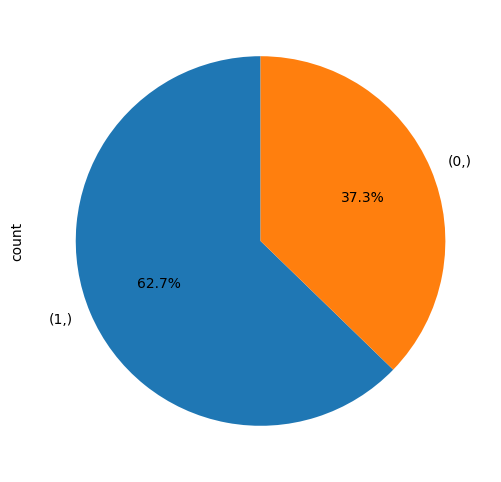

In [6]:
#Barra de value_counts
y_df.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))

In [7]:


cantidad = y_df.value_counts()
print(f"Porcentaje de tumores malignos: {cantidad[1]/cantidad.sum():.2%}")
print(f"Porcentaje Sin tumores malignos: {cantidad[0]/cantidad.sum():.2%}")

Porcentaje de tumores malignos: 62.74%
Porcentaje Sin tumores malignos: 37.26%


In [8]:
print(f"Diferencia: {cantidad[1]/cantidad.sum()-cantidad[0]/cantidad.sum():.2%}")

Diferencia: 25.48%


Dado que los datos no están significativamente desbalanceados, se puede entrenar sin requerir blanceo. Pero en este ejercicio vams a Balancer desdepues de normalizar los datos. Ojo solo balanceamos los datos de entrenamiento, usaremo SMOTE.

**Paso** 2: Dividir los datos
Dividimos los datos en conjuntos de entrenamiento y prueba.


In [9]:
X_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
X_df.isna().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [11]:
#Coeficiente de correlación con seaborn de las columnas de X_df con los valores
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = X_df.corr()

corr_matrix
#plot msps cslor corr_matrix
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.show()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [12]:
#De acuerdo con la tabla anterior los features mean radius, mean perimeter y la mean concavity tiene entre si correlaciones uperiores a 0.8
#por lo tanto lo vamos a retirar del dataset.
X_df.drop(['mean radius', 'mean perimeter', 'mean concavity','radius error'], axis=1, inplace=True)


In [13]:
X_df.shape

(569, 26)

Vamos a entrenarlo con 26 columnas,pero puedes probar los resultados usando modelos de reducción de caracteristicas, SelectKBest, VarianceThreshold, SelectFromModel o usando PCA que veremos mas adelante. Con esto evitamos la "Maldición de la Dimensionalidad"

In [14]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42, stratify=y_df)

In [15]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 26), (114, 26), (455, 1), (114, 1))

<Axes: ylabel='count'>

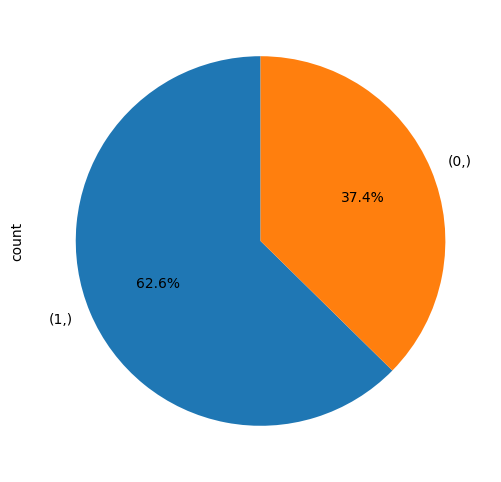

In [16]:

#Barra de value_counts
y_train.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))

Paso 3: Normalizar las características
La normalización es importante en la regresión logística, especialmente si las variables tienen diferentes escalas.


In [17]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[-0.6584246 , -0.93927364, -0.13593988, ..., -1.35052668,
        -0.35265805, -0.54138003],
       [ 0.06650173,  1.74555856,  1.27446827, ...,  1.54991557,
         0.19107787, -0.1737386 ],
       [-0.93112416, -0.86758911, -0.61351479, ..., -1.70744192,
        -0.307734  , -1.21303263],
       ...,
       [ 1.06867262,  0.24018351,  1.64641135, ...,  1.53492543,
         0.16164487,  1.23754763],
       [-0.0380331 ,  0.71527488,  1.33397917, ...,  2.10455077,
         0.31035897,  0.36249578],
       [-0.82431683, -0.84059858,  0.33717171, ..., -0.51332734,
        -0.50756857,  1.30824791]])

In [19]:
#Solo por probar vamos a balancear el X_train y Y_train usando SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

<Axes: xlabel='Clase Tumor'>

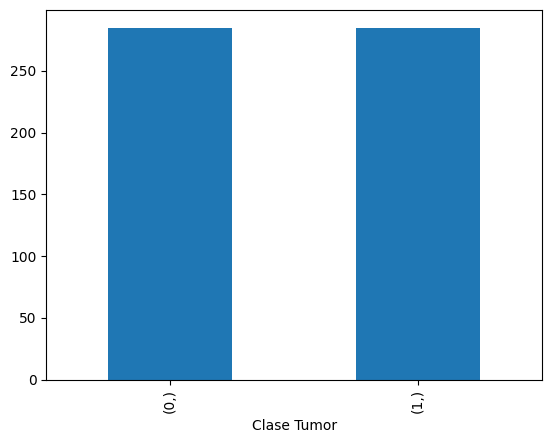

In [ ]:
#barra de y_train_resampled con value_counts
y_train.value_counts().plot(kind='bar')

Paso 4: Entrenar el modelo
Entrenamos un modelo de regresión logística con los datos normalizados.


In [20]:
# Inicializar el modelo de regresión logística
model = LogisticRegression(random_state=42, max_iter=1000)

In [21]:
# Entrenar el modelo con las características seleccionadas
model.fit(X_train_scaled, y_train.values.ravel())

LogisticRegression(max_iter=1000, random_state=42)

In [22]:
# Evaluar el modelo con los datos de prueba
y_pred = model.predict(X_test_scaled)

# Resultados
print("\nAccuracy con las mejores columnas:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy con las mejores columnas: 0.956140350877193

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Los resultados anteriores no dicen que el acuracy es del 99% lo cual es muy bueno. Solo para probar con reducción de características vamos a reentrenar el modelo usando el método RFE.

In [23]:
#Dado que tenemos ahora 26 caracteristicas, quiero seleccionar solo las 10 más importantes,
#Para esto vamos a aplicar RFE para seleccionar características basado en la eliminación de caracteristicas recursivamente

from sklearn.feature_selection import RFE

# Usar RFE para seleccionar las 10 características más importantes
selector = RFE(model, n_features_to_select=10)
X_train_rfe = selector.fit_transform(X_train_scaled, y_train.values.ravel())
X_test_rfe = selector.transform(X_test_scaled)


In [24]:
X_test_rfe

array([[ 1.62076364,  2.19927944,  1.6097947 , ..., -0.18774006,
         0.68856004,  1.20214432],
       [-0.77616958, -0.94077294, -0.70809384, ..., -1.3020369 ,
        -1.06990779, -1.10124064],
       [-0.15277539,  0.07682724, -0.00464429, ...,  2.08968734,
         0.28522046,  0.57255843],
       ...,
       [ 0.18794377,  0.6282387 ,  0.48460144, ...,  1.96094388,
         0.77108239,  1.63386036],
       [-0.44154505, -0.69880121, -0.49700624, ..., -0.42746927,
         0.53093308,  0.06139464],
       [-0.6618226 , -0.13622963, -0.27983003, ...,  0.8999202 ,
        -0.5914636 , -0.23615965]])

In [25]:
X_test_rfe.shape
#Como se observa ahora tenemos 10  caracteristicas tanto en X de entrenamiento y X de prueba.

(114, 10)

In [26]:
#Visualizar el modelo a entrenar
selector

RFE(estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_features_to_select=10)

In [27]:
selector.n_features_in_

26

In [28]:
#Mostras los nombre de las caracteristicas seleccionadas de X_df.columns filtrada por selector.support_
X_df.columns[selector.support_]

Index(['mean area', 'perimeter error', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points'],
      dtype='object')

###Obtener el nombre de las columnas

In [29]:
# Obtener las columnas seleccionadas
# Using X_df.columns which has the correct number of features after dropping columns
columnas_seleccionadas = X_df.columns[selector.support_]
print("Columnas seleccionadas por RFE:")
print(", ".join(columnas_seleccionadas))

Columnas seleccionadas por RFE:
mean area, perimeter error, area error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst concavity, worst concave points


Vamos a reentrenar el escalador con las columnas sugeridas, luego vamos a hacer todo el preprocesamiento.


In [30]:
# Filtrar X_df para que contenga solo las 10 columnas seleccionadas
X= X_df[columnas_seleccionadas]
y=y_df

In [31]:
X.columns

Index(['mean area', 'perimeter error', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points'],
      dtype='object')

In [32]:
y_df[y_df['Clase Tumor']==1]

,Clase Tumor
19,1
20,1
21,1
37,1
46,1
...,...
558,1
559,1
560,1
561,1


In [33]:
X[columnas_seleccionadas][19:20]

,mean area,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst concavity,worst concave points
19,566.3,2.058,23.56,15.11,19.26,99.7,711.2,0.144,0.239,0.1288


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [35]:
X_train

,mean area,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst concavity,worst concave points
546,324.9,1.356,12.970,11.25,21.77,71.12,384.9,0.1285,0.04384,0.02381
432,1250.0,3.008,52.490,22.03,25.07,146.00,1479.0,0.1665,0.53080,0.21730
174,349.6,2.155,21.980,11.54,19.20,73.20,408.3,0.1076,0.00000,0.00000
221,561.3,2.011,21.030,14.98,17.13,101.10,686.6,0.1376,0.25770,0.09090
289,396.0,1.954,17.490,12.36,26.14,79.29,459.3,0.1118,0.07529,0.06203
...,...,...,...,...,...,...,...,...,...,...
184,710.6,1.344,19.530,17.80,28.03,113.80,973.1,0.1301,0.36300,0.12260
300,1217.0,7.237,133.000,25.93,26.24,171.10,2053.0,0.1495,0.61210,0.19800
509,731.3,2.937,32.520,17.11,36.33,117.70,909.4,0.1732,0.59110,0.21630
230,895.0,2.153,31.980,19.59,24.89,133.50,1189.0,0.1703,0.50180,0.25430


In [36]:
# Escalar los datos
scaler10 = StandardScaler()
X_train_scaled = scaler10.fit_transform(X_train)
X_test_scaled = scaler10.transform(X_test)

In [37]:
X_train_scaled[0]

array([-0.93927364, -0.74394898, -0.62980493, -1.03409427, -0.62349743,
       -1.07077336, -0.87653444, -0.16998235, -1.07899452, -1.35052668])

In [38]:
# Entrenar el modelo solo con las características seleccionadas
model.fit(X_train_scaled, y_train.values.ravel())

LogisticRegression(max_iter=1000, random_state=42)

Paso 5: Validar el modelo
Evaluamos el modelo con datos de prueba.


In [39]:
# Evaluar el modelo con los datos de prueba
y_pred = model.predict(X_test_scaled)

# Resultados
print("\nAccuracy con las mejores columnas:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy con las mejores columnas: 0.9736842105263158

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Vems una mejoría del modelo, usando reducción de dimensionales.
"A veces menos es más"

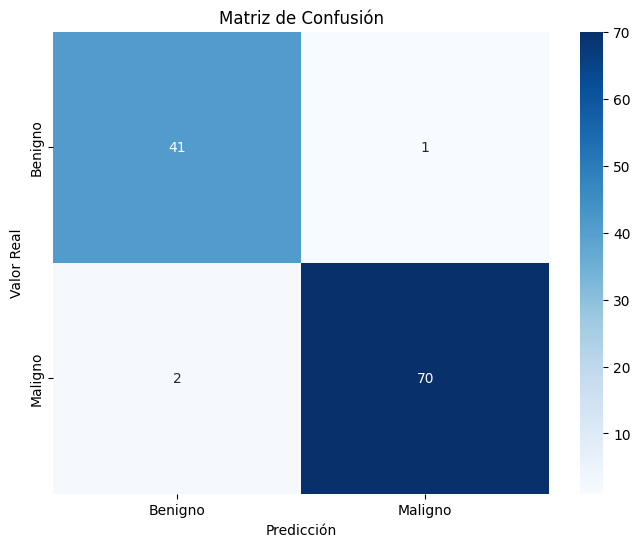

In [40]:
# #MAtriz de confusión con mapa de calor con seaborn

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


In [41]:
# Vamos a predecir un paciente nuevo pero debemos usar solo las 10 columnas seleccionadas por RFE.

columnas_seleccionadas = ['mean area', 'perimeter error', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points']


# Nuevo dato para hacer la predicción (asegúrate de que tenga 10 características)
#nuevo_dato = np.array([[1200.0,3.585,90.03,22.57,26.53,155.50,1800.0,0.1444,0.5504,0.3430]]) #ejemplo benigno
nuevo_dato = np.array([[700,2.1,24,16,20,100,800,0.1444,0.2504,0.1430]]) #EJEMPLO

# Convertir el nuevo dato a un DataFrame con las columnas seleccionadas
nuevo_dato_df = pd.DataFrame(nuevo_dato, columns=columnas_seleccionadas)

# Escalar el nuevo dato
nuevo_dato_scaled = scaler10.transform(nuevo_dato_df)

# Realizar la predicción
prediccion = model.predict(nuevo_dato_scaled)
# Vamos a predecir un paciente nuevo pero debemos usar solo las 10 columnas seleccionadas por RFE.

columnas_seleccionadas = ['mean area', 'perimeter error', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points']


# Nuevo dato para hacer la predicción (asegúrate de que tenga 10 características)
#nuevo_dato = np.array([[1200.0,3.585,90.03,22.57,26.53,155.50,1800.0,0.1444,0.5504,0.3430]]) #ejemplo benigno
nuevo_dato = np.array([[700,2.1,24,16,20,100,800,0.1444,0.2504,0.1430]]) #EJEMPLO

# Convertir el nuevo dato a un DataFrame con las columnas seleccionadas
nuevo_dato_df = pd.DataFrame(nuevo_dato, columns=columnas_seleccionadas)

# Escalar el nuevo dato
nuevo_dato_scaled = scaler10.transform(nuevo_dato_df)

# Realizar la predicción
prediccion = model.predict(nuevo_dato_scaled)

# Interpretar y mostrar la predicción
print(f"La prediccion es la probabilidad de ser un 1", prediccion)
if prediccion <= 0.5:
    print("\nEl modelo predice que el tumor es BENIGNO (clase 0).")
else:
    print("\nEl modelo predice que el tumor es MALIGNO (clase 1).")



La prediccion es la probabilidad de ser un 1 [1]

El modelo predice que el tumor es MALIGNO (clase 1).


**Paso 6: Mejorar el modelo**


* Ajustar hiperparámetros como C (regularización) o max_iter.
* Usar técnicas de selección de características como Recursive Feature Elimination (RFE).
* Usaremos CROSS VALIDATION

Ejemplo de selección de características:


A continuación, se muestra cómo podemos implementar GridSearchCV para encontrar el mejor modelo de regresión logística con los resultados anteriores, utilizando la selección de características mediante RFE.

Pasos para implementar GridSearchCV:
Definir los hiperparámetros que deseamos probar.
Usar GridSearchCV para probar todas las combinaciones de esos hiperparámetros.
Evaluar el mejor modelo basado en la métrica de evaluación.


**Mejores hiperparámetros:** Te mostrará la mejor combinación de hiperparámetros encontrados por GridSearchCV.
**Exactitud:** Te proporcionará la exactitud del modelo con los mejores hiperparámetros en los datos de prueba.
**Reporte de clasificación:** Incluirá métricas como la precisión, recall y F1-score.
**Predicción **para un nuevo dato: Mostrará el resultado de la predicción para un dato que se introduzca manualmente.

In [42]:
X_train_scaled.shape

(455, 10)

In [43]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para GridSearchCV
param_grid = {
    'C': [0.1, 0.2, 0.5, 1],  # Regularización (coeficiente)
    'solver': ['liblinear', 'saga','lbfgs','sag'],  # Algoritmos de optimización
    'penalty': ['l2'],  # Tipo de regularización
    'max_iter': [100, 200, 300,500,1000]  # Número máximo de iteraciones
}

# Inicializar GridSearchCV con validación cruzada
grid_search = GridSearchCV(
    estimator=model,  # Modelo base (LogisticRegression)
    param_grid=param_grid,
    cv=5,  # Validación cruzada de 5 particiones
    scoring='accuracy',  # Métrica para optimizar
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train_scaled,y_train.values.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.5, 1],
                         'max_iter': [100, 200, 300, 500, 1000],
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs', 'sag']},
             scoring='accuracy')

In [44]:
# Mejor modelo encontrado
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados por GridSearchCV:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados por GridSearchCV:
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [45]:
import joblib

# Guardar el modelo entrenado usando joblib
joblib.dump(best_model, 'mejor_modelo_logistico.joblib')

# Evaluar el modelo con los datos de prueba
y_pred = best_model.predict(X_test_scaled)

# Resultados
print("Mejores hiperparámetros encontrados por GridSearchCV:")
print(grid_search.best_params_)


Mejores hiperparámetros encontrados por GridSearchCV:
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [46]:
print("\nAccuracy con los mejores hiperparámetros:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy con los mejores hiperparámetros: 0.9736842105263158

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**GridSearchCV **realiza una búsqueda exhaustiva sobre un conjunto de valores posibles para cada uno de estos hiperparámetros y evalúa qué combinación de ellos da el mejor rendimiento según el criterio que tú elijas (en este caso, accuracy, o precisión). Luego, elige la combinación de parámetros que da el mejor rendimiento en las validaciones cruzadas.

En resumen, los mejores hiperparámetros encontrados por GridSearchCV para este modelo de regresión logística son:

C = 1: Regularización moderada.
max_iter = 100: El modelo convergerá en 100 iteraciones.
penalty = 'l2': Se usa regularización L2 (Ridge).
solver = 'liblinear': El solver de optimización más eficiente para este problema.

Ejemplo de predicción con un nuevo dato

In [47]:
X[:5]

,mean area,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst concavity,worst concave points
0,1001.0,8.589,153.40,25.38,17.33,184.60,2019.0,0.1622,0.7119,0.2654
1,1326.0,3.398,74.08,24.99,23.41,158.80,1956.0,0.1238,0.2416,0.1860
2,1203.0,4.585,94.03,23.57,25.53,152.50,1709.0,0.1444,0.4504,0.2430
3,386.1,3.445,27.23,14.91,26.50,98.87,567.7,0.2098,0.6869,0.2575
4,1297.0,5.438,94.44,22.54,16.67,152.20,1575.0,0.1374,0.4000,0.1625


In [48]:

# Cargar el mejor modelo entrenado
best_model = joblib.load('mejor_modelo_logistico.joblib')

# Las 10 columnas seleccionadas por RFE
columnas_seleccionadas = ['mean area', 'perimeter error', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points']


# Nuevo dato para hacer la predicción (asegúrate de que tenga 10 características)
nuevo_dato = np.array([[1200.0,3.585,90.03,22.57,26.53,155.50,1800.0,0.1444,0.5504,0.3430]])

# Convertir el nuevo dato a un DataFrame con las columnas seleccionadas
nuevo_dato_df = pd.DataFrame(nuevo_dato, columns=columnas_seleccionadas)

# Escalar el nuevo dato
nuevo_dato_scaled = scaler10.transform(nuevo_dato_df)

# Realizar la predicción
prediccion = best_model.predict(nuevo_dato_scaled)

# Interpretar y mostrar la predicción
if prediccion <= 0.5:
    print("\nEl modelo predice que el tumor es BENIGNO (clase 0).")
else:
    print("\nEl modelo predice que el tumor es MALIGNO (clase 1).")



El modelo predice que el tumor es BENIGNO (clase 0).


In [49]:
#El valor de prediccion en porcentaje de probabilidad

prediccion_probabilidad = best_model.predict_proba(nuevo_dato_scaled)
# Access the individual probabilities within the array and format them
prob_benigno, prob_maligno = prediccion_probabilidad[0]
print(f"Probabilidad Benigno: {prob_benigno*100:.2f}%")
print(f"Probabilidad Maligno: {prob_maligno*100:.2f}%")

Probabilidad Benigno: 99.97%
Probabilidad Maligno: 0.03%
